In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab4.ipynb")

# Lab 4: Putting it all together in a mini project

For this lab, **you can choose to work alone of in a group of up to four students**. You are in charge of how you want to work and who you want to work with. Maybe you really want to go through all the steps of the ML process yourself or maybe you want to practice your collaboration skills, it is up to you! Just remember to indicate who your group members are (if any) when you submit on Gradescope. If you choose to work in a group, you only need to use one GitHub repo (you can create one on github.ubc.ca and set the visibility to "public").

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## Submission instructions
rubric={mechanics}

<p>You receive marks for submitting your lab correctly, please follow these instructions:</p>

<ul>
  <li><a href="https://ubc-mds.github.io/resources_pages/general_lab_instructions/">
      Follow the general lab instructions.</a></li>
  <li><a href="https://github.com/UBC-MDS/public/tree/master/rubric">
      Click here to view a description of the rubrics used to grade the questions</a></li>
  <li>Make at least three commits.</li>
  <li>Push your <code>.ipynb</code> file to your GitHub repository for this lab and upload it to Gradescope.</li>
    <ul>
      <li>Before submitting, make sure you restart the kernel and rerun all cells.</li>
    </ul>
  <li>Also upload a <code>.pdf</code> export of the notebook to facilitate grading of manual questions (preferably WebPDF, you can select two files when uploading to gradescope)</li>
  <li>Don't change any variable names that are given to you, don't move cells around, and don't include any code to install packages in the notebook.</li>
  <li>The data you download for this lab <b>SHOULD NOT BE PUSHED TO YOUR REPOSITORY</b> (there is also a <code>.gitignore</code> in the repo to prevent this).</li>
  <li>Include a clickable link to your GitHub repo for the lab just below this cell
    <ul>
      <li>It should look something like this https://github.ubc.ca/MDS-2020-21/DSCI_531_labX_yourcwl.</li>
    </ul>
  </li>
</ul>
</div>

_Points:_ 2

https://github.ubc.ca/MDS-2023-24/DSCI_573_lab4_wangcx12

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this lab you will be working on an open-ended mini-project, where you will put all the different things you have learned so far in 571 and 573 together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. Since this mini-project is open-ended there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you instead do a bunch of sane things and you have clearly motivated your choices, but still get lower model performance than your friend, don't sweat it.


#### A final note
Finally, the style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "several hours" but not "many hours" is a good guideline for a high quality submission. Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and we hope you enjoy it as well. 

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
rubric={reasoning}

In this mini project, you will pick one of the following problems: 

1. A classification problem of predicting whether a credit card client will default or not. For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

OR 

2. A regression problem of predicting `reviews_per_month`, as a proxy for the popularity of the listing with [New York City Airbnb listings from 2019 dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data). Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 
3. Carry out any preliminary preprocessing, if needed (e.g., changing feature names, handling of NaN values etc.)
    
</div>

_Points:_ 3

I picked the first problem of predicting whether a credit card client will default or not. This is a binary classification question, where the target variable is `default.payment.next.month` indicating whether the client will default in the next month (1 for yes, 0 for no). The dataset includes a variety of features, such as credit limit (LIMIT_BAL), demographic information like gender (SEX, 1=male, 2=female), education level (EDUCATION), marital status (MARRIAGE), repayment history for the past six months (PAY_0 to PAY_6), bill amounts (BILL_AMT1 to BILL_AMT6) and previous payment amounts (PAY_AMT1 to PAY_AMT6).  
Since this dataset is related to credit card default, I should explore whether there is a class imbalance.

In [2]:
# import
import pandas as pd
import altair as alt
alt.data_transformers.enable("vegafusion")
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

In [3]:
df = pd.read_csv('data/UCI_Credit_Card.csv')
df = df.rename(columns={'default.payment.next.month': 'target_default'})
df.columns = df.columns.str.lower()

In [4]:
# There are no missing values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              30000 non-null  int64  
 1   limit_bal       30000 non-null  float64
 2   sex             30000 non-null  int64  
 3   education       30000 non-null  int64  
 4   marriage        30000 non-null  int64  
 5   age             30000 non-null  int64  
 6   pay_0           30000 non-null  int64  
 7   pay_2           30000 non-null  int64  
 8   pay_3           30000 non-null  int64  
 9   pay_4           30000 non-null  int64  
 10  pay_5           30000 non-null  int64  
 11  pay_6           30000 non-null  int64  
 12  bill_amt1       30000 non-null  float64
 13  bill_amt2       30000 non-null  float64
 14  bill_amt3       30000 non-null  float64
 15  bill_amt4       30000 non-null  float64
 16  bill_amt5       30000 non-null  float64
 17  bill_amt6       30000 non-null 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 2. Data splitting <a name="2"></a>
rubric={reasoning}

**Your tasks:**

1. Split the data into train and test portions.

> Make the decision on the `test_size` based on the capacity of your laptop. 
    
</div>

_Points:_ 1

In [5]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=123)
X_train, y_train = train_df.drop(columns=["target_default"]), train_df["target_default"]
X_test, y_test = test_df.drop(columns=["target_default"]), test_df["target_default"]
train_df.head()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,target_default
19682,19683,200000.0,2,2,1,46,0,0,0,0,...,103422.0,95206.0,65108.0,3692.0,5000.0,3300.0,2500.0,2930.0,1500.0,0
11062,11063,120000.0,2,1,1,32,-1,-1,-1,-1,...,476.0,802.0,326.0,652.0,326.0,476.0,802.0,0.0,326.0,1
197,198,20000.0,2,1,2,22,0,0,0,0,...,8332.0,18868.0,19247.0,1500.0,1032.0,541.0,20000.0,693.0,1000.0,0
23620,23621,100000.0,2,5,2,34,0,0,0,0,...,23181.0,7721.0,3219.0,5004.0,3811.0,3002.0,4000.0,3219.0,1864.0,0
26031,26032,290000.0,2,2,2,29,0,0,0,0,...,8770.0,9145.0,10016.0,1130.0,1502.0,1300.0,500.0,1000.0,1001.0,0


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 3. EDA <a name="3"></a>
rubric={viz,reasoning}
    
Perform exploratory data analysis on the train set.

**Your tasks:**

1. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
2. Summarize your initial observations about the data. 
3. Pick appropriate metric/metrics for assessment. 
    
</div>

_Points:_ 6

_Type your answer here, replacing this text._

In [6]:
# General statistic of features
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,24000.0,14964.174292,8660.479272,1.0,7467.75,14975.0,22460.25,30000.0
limit_bal,24000.0,167893.486667,130109.666875,10000.0,50000.00,140000.0,240000.00,1000000.0
sex,24000.0,1.603125,0.489260,1.0,1.00,2.0,2.00,2.0
education,24000.0,1.851958,0.790560,0.0,1.00,2.0,2.00,6.0
marriage,24000.0,1.553375,0.521452,0.0,1.00,2.0,2.00,3.0
age,24000.0,35.488458,9.217424,21.0,28.00,34.0,41.00,79.0
pay_0,24000.0,-0.017542,1.125331,-2.0,-1.00,0.0,0.00,8.0
pay_2,24000.0,-0.135292,1.199812,-2.0,-1.00,0.0,0.00,8.0
pay_3,24000.0,-0.170042,1.201709,-2.0,-1.00,0.0,0.00,8.0
pay_4,24000.0,-0.224292,1.170630,-2.0,-1.00,0.0,0.00,8.0


- The ranges for different features are very different in this dataset, so scaler is needed.


    


In [7]:
# Distribution of the Target Variable
alt.Chart(train_df).mark_bar().encode(
    x=alt.X('target_default:N', title='1: Yes, 0: No'),
    y=alt.Y('count()', title='Count'),
    color='target_default:N'
).properties(
    title='Default Payment Next Month',
    width=400
)

alt.Chart(...)

- From this visualization of target class, it is clear that the target is imbalanced. There are more clients default than not default.

In [8]:
train_df.corr('spearman').style.background_gradient()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,target_default
id,1.000000,0.028469,0.021694,0.039377,-0.027409,0.026562,-0.020636,-0.001546,-0.006584,-0.000507,-0.014848,-0.005927,0.012719,0.012799,0.019714,0.035414,0.017515,0.021229,0.014044,0.054245,0.092890,0.019025,0.011364,0.037639,-0.013663
limit_bal,0.028469,1.000000,0.060169,-0.269342,-0.115429,0.185045,-0.297013,-0.343210,-0.332020,-0.308016,-0.281681,-0.261785,0.052238,0.044509,0.061552,0.075757,0.081559,0.090824,0.270676,0.280822,0.286323,0.283519,0.294502,0.316610,-0.164635
sex,0.021694,0.060169,1.000000,0.016446,-0.034660,-0.091806,-0.053721,-0.072805,-0.066877,-0.059852,-0.050116,-0.038584,-0.043248,-0.040394,-0.027774,-0.021388,-0.012566,-0.008118,-0.003166,0.008268,0.022290,0.013667,0.013616,0.036850,-0.043814
education,0.039377,-0.269342,0.016446,1.000000,-0.162820,0.158310,0.139335,0.173029,0.166247,0.156070,0.140858,0.128574,0.100161,0.097232,0.083805,0.072518,0.064001,0.059661,-0.040496,-0.050552,-0.041430,-0.041826,-0.049480,-0.053618,0.047575
marriage,-0.027409,-0.115429,-0.034660,-0.162820,1.000000,-0.462261,0.019997,0.033960,0.040346,0.039739,0.044412,0.038160,-0.001109,0.001563,-0.003423,0.000362,-0.003043,-0.001289,-0.008185,-0.018980,-0.014063,-0.021571,-0.017768,-0.021047,-0.025359
age,0.026562,0.185045,-0.091806,0.158310,-0.462261,1.000000,-0.056751,-0.078259,-0.079111,-0.075554,-0.078913,-0.069302,0.007471,0.007098,0.006361,0.001605,0.005877,0.005530,0.035641,0.043351,0.033097,0.043230,0.039578,0.040332,0.006196
pay_0,-0.020636,-0.297013,-0.053721,0.139335,0.019997,-0.056751,1.000000,0.626059,0.548310,0.516108,0.484550,0.461945,0.315844,0.332046,0.314524,0.304603,0.299338,0.287858,-0.096829,-0.064678,-0.057278,-0.031067,-0.028266,-0.046358,0.288651
pay_2,-0.001546,-0.343210,-0.072805,0.173029,0.033960,-0.078259,0.626059,1.000000,0.802436,0.715323,0.674924,0.632789,0.572869,0.554516,0.520239,0.496316,0.476632,0.457259,0.022447,0.084354,0.085765,0.095336,0.099057,0.080687,0.215009
pay_3,-0.006584,-0.332020,-0.066877,0.166247,0.040346,-0.079111,0.548310,0.802436,1.000000,0.803100,0.718232,0.670359,0.526818,0.593251,0.560372,0.531695,0.507870,0.484343,0.218532,0.040167,0.103918,0.120145,0.127454,0.094928,0.195484
pay_4,-0.000507,-0.308016,-0.059852,0.156070,0.039739,-0.075554,0.516108,0.715323,0.803100,1.000000,0.821506,0.729281,0.513242,0.561968,0.620096,0.591472,0.559134,0.529446,0.188553,0.247401,0.070495,0.144809,0.160479,0.140376,0.173174


- The correlation heatmap shows the pairwise correlation coefficients between numerical features. From this plot, we notice that correlation between repayments, correlation between bill amounts, and correlation between payment amounts are relatively high. 

In [9]:
# Distribution of some numerics columns
eda_num_columns = ['age', 'limit_bal']
alt.Chart(train_df).mark_bar(opacity=0.6).encode(
    alt.X(alt.repeat('row')).bin(maxbins=50),
    alt.Y('count()').stack(False),
    color='target_default:N'
).properties(
    width=300,
    height=200
).repeat(row=eda_num_columns)

alt.RepeatChart(...)

In [10]:
# Distribution of some categorical columns
eda_cat_columns = ['education', 'marriage', 'sex']
alt.Chart(train_df).mark_bar().encode(
    alt.Y(alt.repeat('row')).type("nominal").sort('-x'),
    alt.X('count()'),
    color='target_default:N'
).properties(
    width=300,
    height=200
).facet('target_default').repeat(row=eda_cat_columns)

alt.RepeatChart(...)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 4. Feature engineering (Challenging)
rubric={reasoning}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing.
    
</div>

_Points:_ 0.5

In [11]:
...

Ellipsis

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 5. Preprocessing and transformations <a name="5"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 
    
</div>

_Points:_ 4

In [12]:
drop_feats = ['id']
numeric_feats = ['limit_bal', 'age',
                 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6',
                 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']
categorical_feats = ['sex', 'marriage']
pass_feats = ['education',
              'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

In [13]:
# Create the column transformer
preprocessor = make_column_transformer(
    (StandardScaler(), numeric_feats),
    ('passthrough', pass_feats),
    (OneHotEncoder(drop='if_binary', handle_unknown="ignore"), categorical_feats),
    ("drop", drop_feats)
)

# Show the preprocessor
preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['limit_bal', 'age', 'bill_amt1', 'bill_amt2',
                                  'bill_amt3', 'bill_amt4', 'bill_amt5',
                                  'bill_amt6', 'pay_amt1', 'pay_amt2',
                                  'pay_amt3', 'pay_amt4', 'pay_amt5',
                                  'pay_amt6']),
                                ('passthrough', 'passthrough',
                                 ['education', 'pay_0', 'pay_2', 'pay_3',
                                  'pay_4', 'pay_5', 'pay_6']),
                                ('onehotencoder',
                                 OneHotEncoder(drop='if_binary',
                                               handle_unknown='ignore'),
                                 ['sex', 'marriage']),
                                ('drop', 'drop', ['id'])])

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 6. Baseline model <a name="6"></a>
rubric={accuracy}

**Your tasks:**
1. Train a baseline model for your task and report its performance.
    
</div>

_Points:_ 2

As noticed before, because of the imbalanced class, the dummy classifier has a high accuracy score.

In [64]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report

dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(X_train, y_train)

# Evaluate the performance
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
classification_rep_dummy = classification_report(y_test, dummy_classifier.predict(X_test))

# Print the results
print("Dummy Classifier:")
print(f"Accuracy: {accuracy_dummy:.4f}")
print("\nClassification Report:\n", classification_rep_dummy)

Dummy Classifier:
Accuracy: 0.7827

Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      4696
           1       0.00      0.00      0.00      1304

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000



/Users/chenxinwang/miniconda3/envs/573/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chenxinwang/miniconda3/envs/573/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chenxinwang/miniconda3/envs/573/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

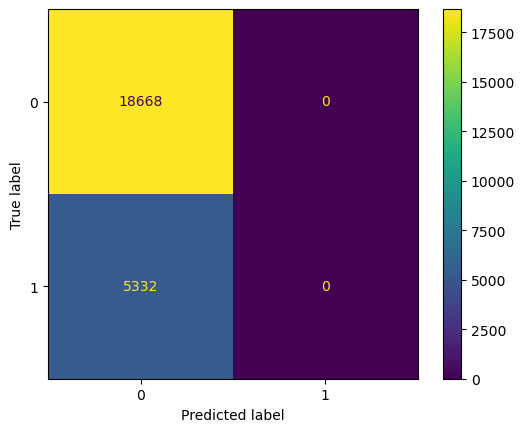

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
confmat = ConfusionMatrixDisplay.from_predictions(
    y_train,
    cross_val_predict(dummy_classifier, X_train, y_train)
)

# Show the matrix
confmat

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 7. Linear models <a name="7"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the regularization hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.
    
</div>

_Points:_ 8

_Type your answer here, replacing this text._

In [15]:
...

Ellipsis

In [16]:
...

Ellipsis

In [17]:
...

Ellipsis

In [18]:
...

Ellipsis

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 8. Different models <a name="8"></a>
rubric={accuracy,reasoning}

**Your tasks:**
1. Try out three other models aside from the linear model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat the performance of the linear model? 
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [19]:
...

Ellipsis

In [20]:
...

Ellipsis

In [21]:
...

Ellipsis

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 9. Feature selection (Challenging)
rubric={reasoning}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV`, forward/backward selection or L1 regularization for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises unless you think there are other benefits with using less features.
    
</div>

_Points:_ 0.5

_Type your answer here, replacing this text._

In [22]:
...

Ellipsis

In [23]:
...

Ellipsis

In [24]:
...

Ellipsis

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 10. Hyperparameter optimization
rubric={accuracy,reasoning}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods.  Briefly summarize your results.
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 
    
</div>

_Points:_ 6

_Type your answer here, replacing this text._

In [25]:
...

Ellipsis

In [26]:
...

Ellipsis

In [27]:
...

Ellipsis

In [28]:
...

Ellipsis

In [29]:
...

Ellipsis

In [30]:
...

Ellipsis

In [31]:
...

Ellipsis

In [32]:
...

Ellipsis

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 11. Interpretation and feature importances <a name="1"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 
    
</div>

_Points:_ 8

_Type your answer here, replacing this text._

In [33]:
...

Ellipsis

In [34]:
...

Ellipsis

In [35]:
...

Ellipsis

In [36]:
...

Ellipsis

In [37]:
...

Ellipsis

In [38]:
...

Ellipsis

In [39]:
...

Ellipsis

In [40]:
...

Ellipsis

In [41]:
...

Ellipsis

In [42]:
...

Ellipsis

In [43]:
...

Ellipsis

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 12. Results on the test set <a name="12"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain them with SHAP force plots.  
    
</div>

_Points:_ 6

_Type your answer here, replacing this text._

In [44]:
...

Ellipsis

In [45]:
...

Ellipsis

In [46]:
...

Ellipsis

In [47]:
...

Ellipsis

In [48]:
...

Ellipsis

In [49]:
...

Ellipsis

In [50]:
...

Ellipsis

In [51]:
...

Ellipsis

In [52]:
...

Ellipsis

In [53]:
...

Ellipsis

In [54]:
...

Ellipsis

In [55]:
...

Ellipsis

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 13. Summary of results <a name="13"></a>
rubric={reasoning}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook.
    
</div>

_Points:_ 8

_Type your answer here, replacing this text._

In [56]:
...

Ellipsis

In [57]:
...

Ellipsis

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 14. Creating a data analysis pipeline (Challenging)
rubric={reasoning}

**Your tasks:**

- Convert this notebook into scripts to create a reproducible data analysis pipeline with appropriate documentation. Submit your project folder in addition to this notebook on GitHub and briefly comment on your organization in the text box below.
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 15. Your takeaway from the course (Challenging)
rubric={reasoning}

**Your tasks:**

What is your biggest takeaway from this course? 
    
</div>

_Points:_ 0.25

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<div class="alert alert-danger" style="color:black">
    
**Restart, run all and export a PDF before submitting**
    
Before submitting,
don't forget to run all cells in your notebook
to make sure there are no errors
and so that the TAs can see your plots on Gradescope.
You can do this by clicking the ▶▶ button
or going to `Kernel -> Restart Kernel and Run All Cells...` in the menu.
This is not only important for MDS,
but a good habit you should get into before ever committing a notebook to GitHub,
so that your collaborators can run it from top to bottom
without issues.
    
After running all the cells,
export a PDF of the notebook (preferably the WebPDF export)
and upload this PDF together with the ipynb file to Gradescope
(you can select two files when uploading to Gradescope)
</div>

---

## Help us improve the labs

The MDS program is continually looking to improve our courses, including lab questions and content. The following optional questions will not affect your grade in any way nor will they be used for anything other than program improvement:

1. Approximately how many hours did you spend working or thinking about this assignment (including lab time)?

#Ans:

2. Do you have any feedback on the lab you be willing to share? For example, any part or question that you particularly liked or disliked?

#Ans: